In [1]:
# Import Python Libraries
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
car_crash_df=pd.read_csv("Drivers_Data.csv")

In [3]:
car_crash_df.head(5)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


In [4]:
print('There are {} rows and {} columns in our dataset'.format(car_crash_df.shape[0],car_crash_df.shape[1]))

There are 184175 rows and 39 columns in our dataset


In [5]:
car_crash_df.describe()

,Speed Limit,Vehicle Year,Latitude,Longitude
count,184175.000000,184175.000000,184175.000000,184175.000000
mean,32.424976,1965.986860,39.083140,-77.112264
std,11.155826,340.652212,0.071941,0.098475
min,0.000000,0.000000,37.720000,-79.486000
25%,25.000000,2006.000000,39.024452,-77.189440
50%,35.000000,2012.000000,39.074918,-77.105335
75%,40.000000,2016.000000,39.139886,-77.039243
max,75.000000,9999.000000,39.990414,-75.527708


In [6]:
car_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184175 entries, 0 to 184174
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  184175 non-null  object 
 1   Local Case Number              184175 non-null  object 
 2   Agency Name                    184175 non-null  object 
 3   ACRS Report Type               184175 non-null  object 
 4   Crash Date/Time                184175 non-null  object 
 5   Route Type                     166102 non-null  object 
 6   Road Name                      165626 non-null  object 
 7   Cross-Street Name              160778 non-null  object 
 8   Off-Road Description           17035 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           5880 non-null    object 
 11  Collision Type                 183590 non-null  object 
 12  Weather                       

In [7]:
car_crash_df.isnull().sum()

,0
Report Number,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,18073
Road Name,18549
Cross-Street Name,23397
Off-Road Description,167140
Municipality,165049


In [8]:
#droping columns
dropped_df=car_crash_df.drop(['Report Number','Off-Road Description','Municipality','Related Non-Motorist','Non-Motorist Substance Abuse','Circumstance'],axis=1)
dropped_df

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,Surface Condition,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,OTHER,CLEAR,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,OTHER,CLEAR,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,OTHER,CLEAR,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184170,240041159,MONTGOMERY,Property Damage Crash,08/30/2024 06:47:00 PM,Maryland (State) Route,MIDCOUNTY HWY (SB/L),NaN,"Sideswipe, Same Direction",Clear,Dry,...,Northbound,50,No,No,2015,TOYOTA,CAMRY,39.155325,-77.181098,"(39.1553253, -77.18109811)"
184171,240040441,MONTGOMERY,Property Damage Crash,08/26/2024 06:25:00 PM,County Route,LORAIN AVE,NaN,"Sideswipe, Opposite Direction",Clear,Dry,...,Southbound,25,No,No,2021,PIERCE MANUFACTURING,UNKNOWN,39.019576,-77.017265,"(39.01957551, -77.01726522)"
184172,240040858,MONTGOMERY,Property Damage Crash,08/29/2024 05:18:00 AM,County Route,FRANKFORT DR,NaN,"Sideswipe, Opposite Direction",Clear,Dry,...,Southbound,25,No,No,2014,ACURA,RLX,39.082130,-77.085506,"(39.0821299, -77.08550628)"
184173,240040806,MONTGOMERY,Property Damage Crash,08/28/2024 07:00:00 PM,Maryland (State) Route,PINEY BRANCH RD,CARROLL AVE,"Sideswipe, Opposite Direction",Clear,Dry,...,Northbound,30,No,No,2016,TOYOTA,CAMRY,38.999980,-76.990666,"(38.99997981, -76.99066629)"


In [9]:
dropped_df.isnull().sum()

,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,18073
Road Name,18549
Cross-Street Name,23397
Collision Type,585
Weather,13356
Surface Condition,21269


In [10]:
dropna_df=dropped_df.dropna()
dropna_df

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,Surface Condition,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
5,230051804,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 AM,Maryland (State),NORBECK RD,DRURY RD,SAME DIR REAR END,CLOUDY,DRY,...,East,30,No,No,2010,MERCEDES,ML360,39.116462,-77.050530,"(39.11646167, -77.05053)"
6,230046425,Montgomery County Police,Property Damage Crash,07/27/2023 12:30:00 PM,County,GREENTREE RD,OLD GEORGETOWN RD,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,...,East,30,No,No,2022,HOND,PILOT,39.000144,-77.109881,"(39.00014446, -77.10988077)"
8,230065250,Montgomery County Police,Property Damage Crash,11/10/2023 08:24:00 PM,Maryland (State),GEORGIA AVE,MAY ST,SAME DIR REAR END,CLEAR,DRY,...,South,35,No,No,2016,TOYOTA,CAMRY,39.072460,-77.064860,"(39.0724598, -77.06486034)"
9,230060937,Montgomery County Police,Property Damage Crash,10/16/2023 07:33:00 PM,Maryland (State),GEORGIA AVE,LINDELL ST,HEAD ON LEFT TURN,CLEAR,DRY,...,South,35,No,No,2021,HONDA,ACCORD,39.054407,-77.050488,"(39.05440667, -77.05048833)"
10,230057666,Gaithersburg Police Depar,Property Damage Crash,09/30/2023 10:34:00 AM,Municipality,PERRY PKWY,ENT TO SHOPPING CENTER,STRAIGHT MOVEMENT ANGLE,CLOUDY,DRY,...,West,35,No,No,2002,HOND,ACCORD,39.148779,-77.213439,"(39.14877898, -77.21343947)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184141,240040966,MONTGOMERY,Injury Crash,08/29/2024 05:11:00 PM,County Route,BOURNEFIELD WAY,BROADBIRCH DR,Angle,"Fog, Smog, Smoke",Dry,...,Southbound,25,No,No,2005,HYUNDAI,SONATA,39.055611,-76.961737,"(39.05561076, -76.96173688)"
184144,240041478,MONTGOMERY,Property Damage Crash,09/01/2024 10:23:00 PM,Maryland (State) Route,NORBECK RD,LAYHILL RD (SB/L),Angle,Clear,Dry,...,Westbound,45,No,No,2016,HONDA,ACCORD,39.120502,-77.034008,"(39.1205018, -77.03400827)"
184150,240041182,MONTGOMERY,Injury Crash,08/30/2024 11:55:00 PM,Maryland (State) Route,NEW HAMPSHIRE AVE (SB/L),FOX ST,Front to Rear,Clear,Dry,...,Southbound,35,No,No,2005,HONDA,ACCORD,39.008193,-76.979999,"(39.00819331, -76.97999857)"
184167,240041125,MONTGOMERY,Property Damage Crash,08/30/2024 04:11:00 PM,County Route,LEAMAN FARM RD,GREAT SENECA HWY (SB/L),Angle,Clear,Dry,...,Eastbound,35,No,No,2010,TOYOTA,COROLLA,39.155791,-77.276755,"(39.15579135, -77.27675486)"


In [11]:
dropna_df.shape

(100248, 33)

In [12]:
dropna_df.isnull().sum()

,0
Local Case Number,0
Agency Name,0
ACRS Report Type,0
Crash Date/Time,0
Route Type,0
Road Name,0
Cross-Street Name,0
Collision Type,0
Weather,0
Surface Condition,0


#EDA

In [13]:
print("Number of different type of report when filed after car crash:")
len(dropna_df['ACRS Report Type'].unique())

Number of different type of report when filed after car crash:


3

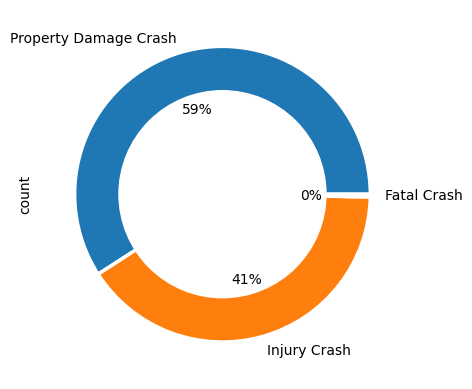

In [14]:
dropna_df['ACRS Report Type'].value_counts().plot(kind='pie',autopct='%0.0f%%',startangle=1800, wedgeprops = { 'linewidth' : 2.5, 'edgecolor' : 'white' })
my_circle=plt.Circle( (0,0), 0.70, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
print("Number of different type of collision when filed after car crash:")
len(dropna_df['ACRS Report Type'].unique())

Number of different type of collision when filed after car crash:


3

<Axes: ylabel='Collision Type'>

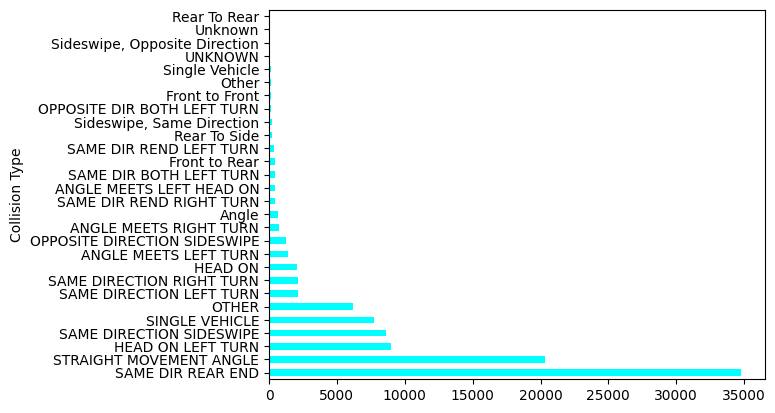

In [16]:
dropna_df['Collision Type'].value_counts().plot(kind='barh',color="cyan")


In [17]:
print("Different Weather conditions:")
len(dropna_df['Weather'].unique())

Different Weather conditions:


20

<Axes: ylabel='Weather'>

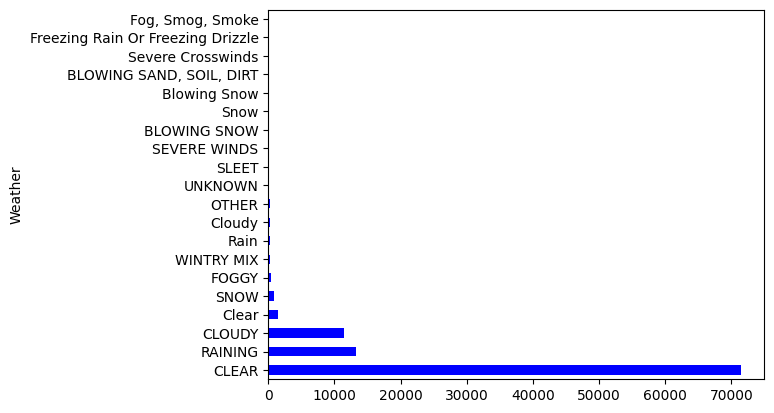

In [18]:
dropna_df['Weather'].value_counts().plot(kind='barh',color="blue")

In [19]:
print("Different Surface conditions:")
len(dropna_df['Surface Condition'].unique())

Different Surface conditions:


18

<Axes: ylabel='Surface Condition'>

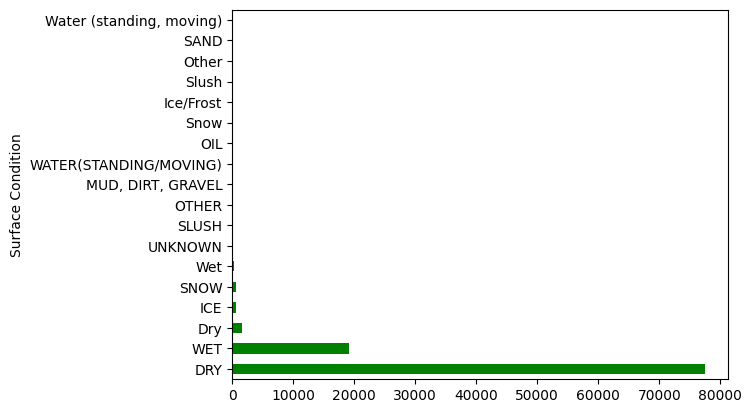

In [20]:
dropna_df['Surface Condition'].value_counts().plot(kind='barh',color="green")

In [21]:
print("Different Light conditions:")
len(dropna_df['Light'].unique())

Different Light conditions:


16

<Axes: ylabel='Light'>

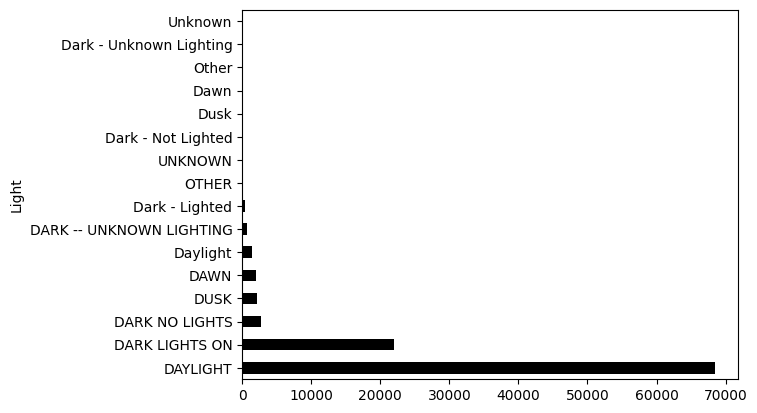

In [22]:
dropna_df['Light'].value_counts().plot(kind='barh',color="black")

In [23]:
print("Driver Substance Abuse while he was driving:")
len(dropna_df['Driver Substance Abuse'].unique())

Driver Substance Abuse while he was driving:


18

<Axes: ylabel='Driver Substance Abuse'>

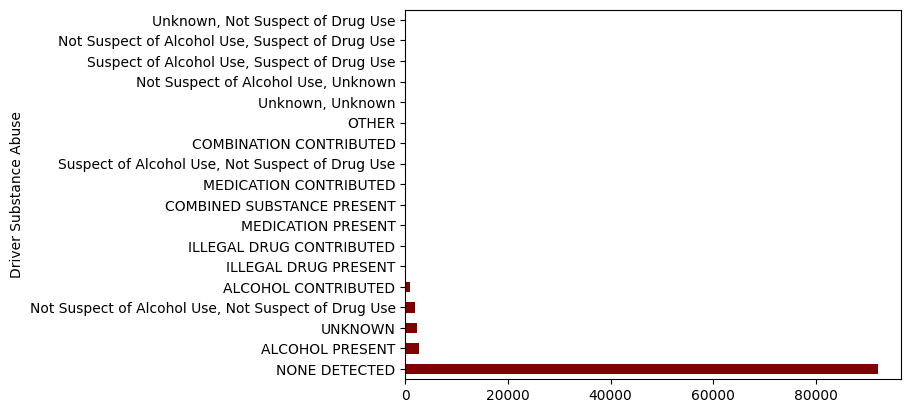

In [24]:
dropna_df['Driver Substance Abuse'].value_counts().plot(kind='barh',color="maroon")

In [25]:
print("Different Injury Severity conditions:")
len(dropna_df['Injury Severity'].unique())

Different Injury Severity conditions:


10

<Axes: ylabel='Injury Severity'>

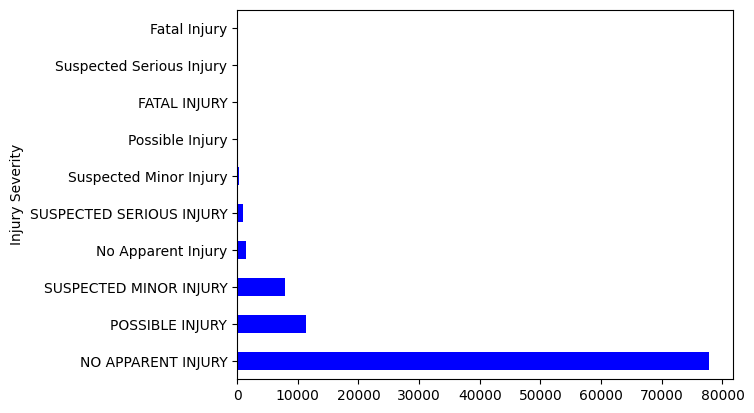

In [26]:
dropna_df['Injury Severity'].value_counts().plot(kind='barh',color="blue")

In [27]:
print("Vehicle Body Type:")
len(dropna_df['Vehicle Body Type'].unique())

Vehicle Body Type:


47

<Axes: ylabel='Vehicle Body Type'>

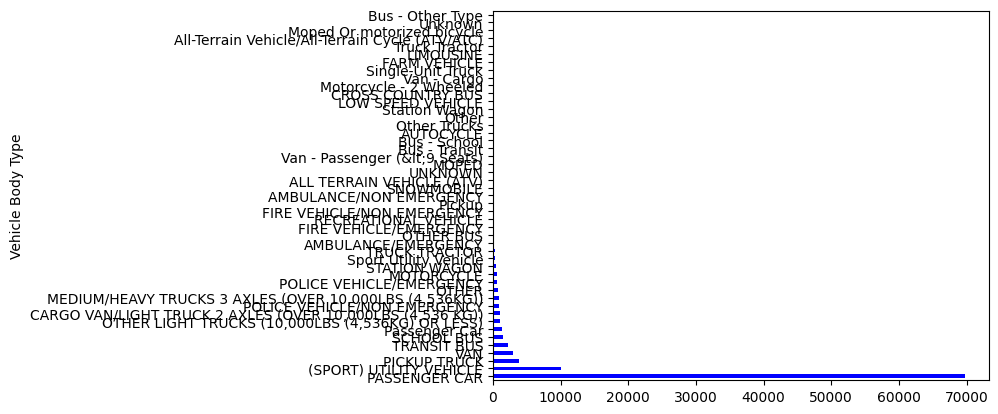

In [28]:
dropna_df['Vehicle Body Type'].value_counts().plot(kind='barh',color="blue")

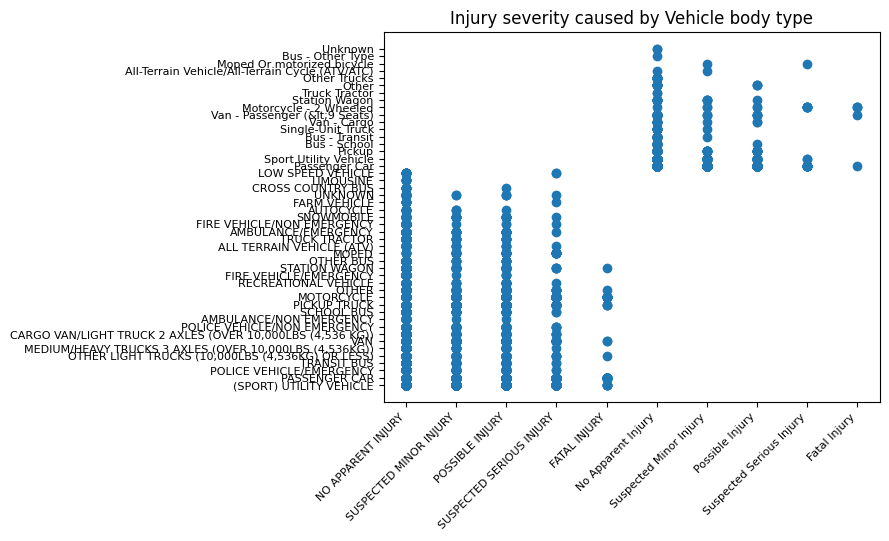

In [29]:
plt.scatter(dropna_df['Injury Severity'],dropna_df['Vehicle Body Type'])
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.title("Injury severity caused by Vehicle body type")
plt.show()

<Axes: xlabel='Driver At Fault'>

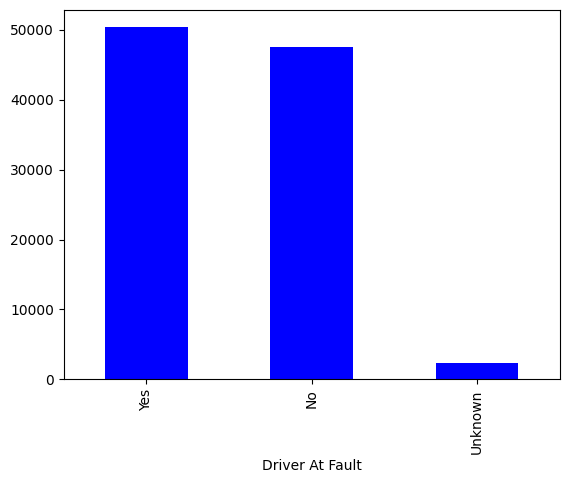

In [30]:
dropna_df['Driver At Fault'].value_counts().plot(kind='bar',color="blue")

Local Case Number                 object
Agency Name                       object
ACRS Report Type                  object
Crash Date/Time                   object
Route Type                        object
Road Name                         object
Cross-Street Name                 object
Collision Type                    object
Weather                           object
Surface Condition                 object
Light                             object
Traffic Control                   object
Driver Substance Abuse            object
Person ID                         object
Driver At Fault                   object
Injury Severity                   object
Driver Distracted By              object
Drivers License State             object
Vehicle ID                        object
Vehicle Damage Extent             object
Vehicle First Impact Location     object
Vehicle Body Type                 object
Vehicle Movement                  object
Vehicle Going Dir                 object
Speed Limit     

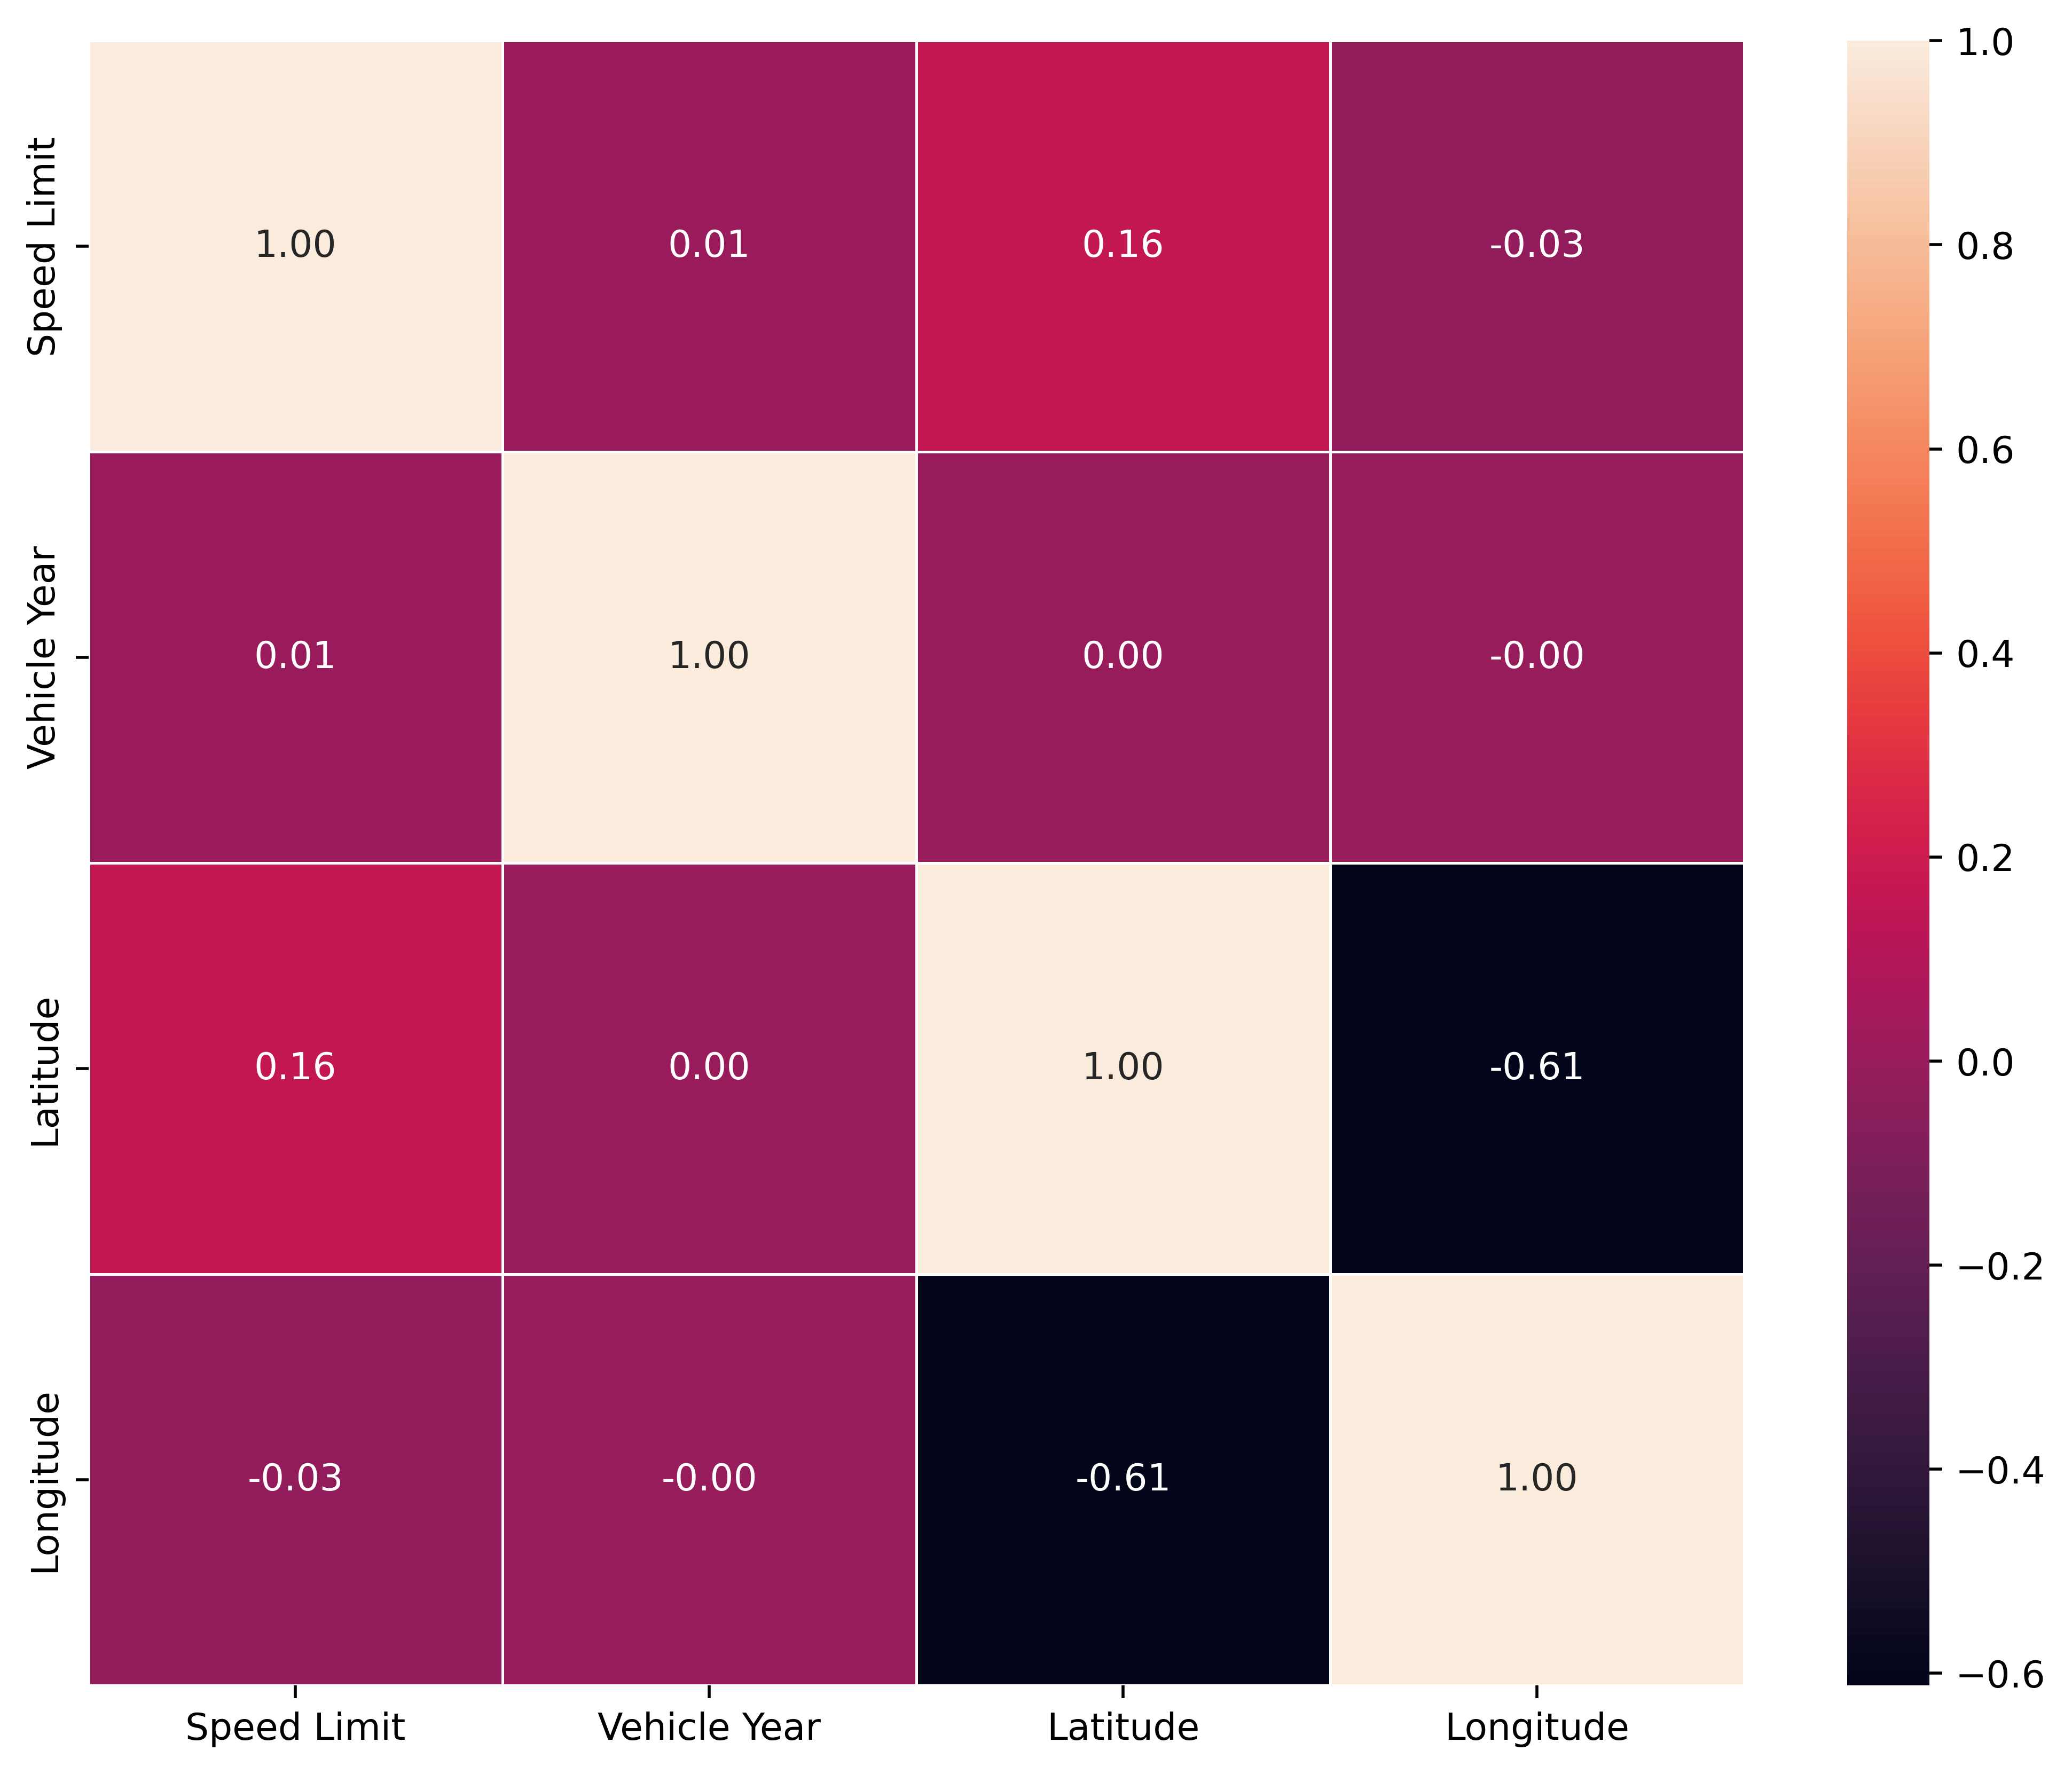

In [31]:

# Check data types
print(dropna_df.dtypes)

# Select only numeric columns
numeric_df = dropna_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5)
plt.show()


Local Case Number                 object
Agency Name                       object
ACRS Report Type                  object
Crash Date/Time                   object
Route Type                        object
Road Name                         object
Cross-Street Name                 object
Collision Type                    object
Weather                           object
Surface Condition                 object
Light                             object
Traffic Control                   object
Driver Substance Abuse            object
Person ID                         object
Driver At Fault                   object
Injury Severity                   object
Driver Distracted By              object
Drivers License State             object
Vehicle ID                        object
Vehicle Damage Extent             object
Vehicle First Impact Location     object
Vehicle Body Type                 object
Vehicle Movement                  object
Vehicle Going Dir                 object
Speed Limit     

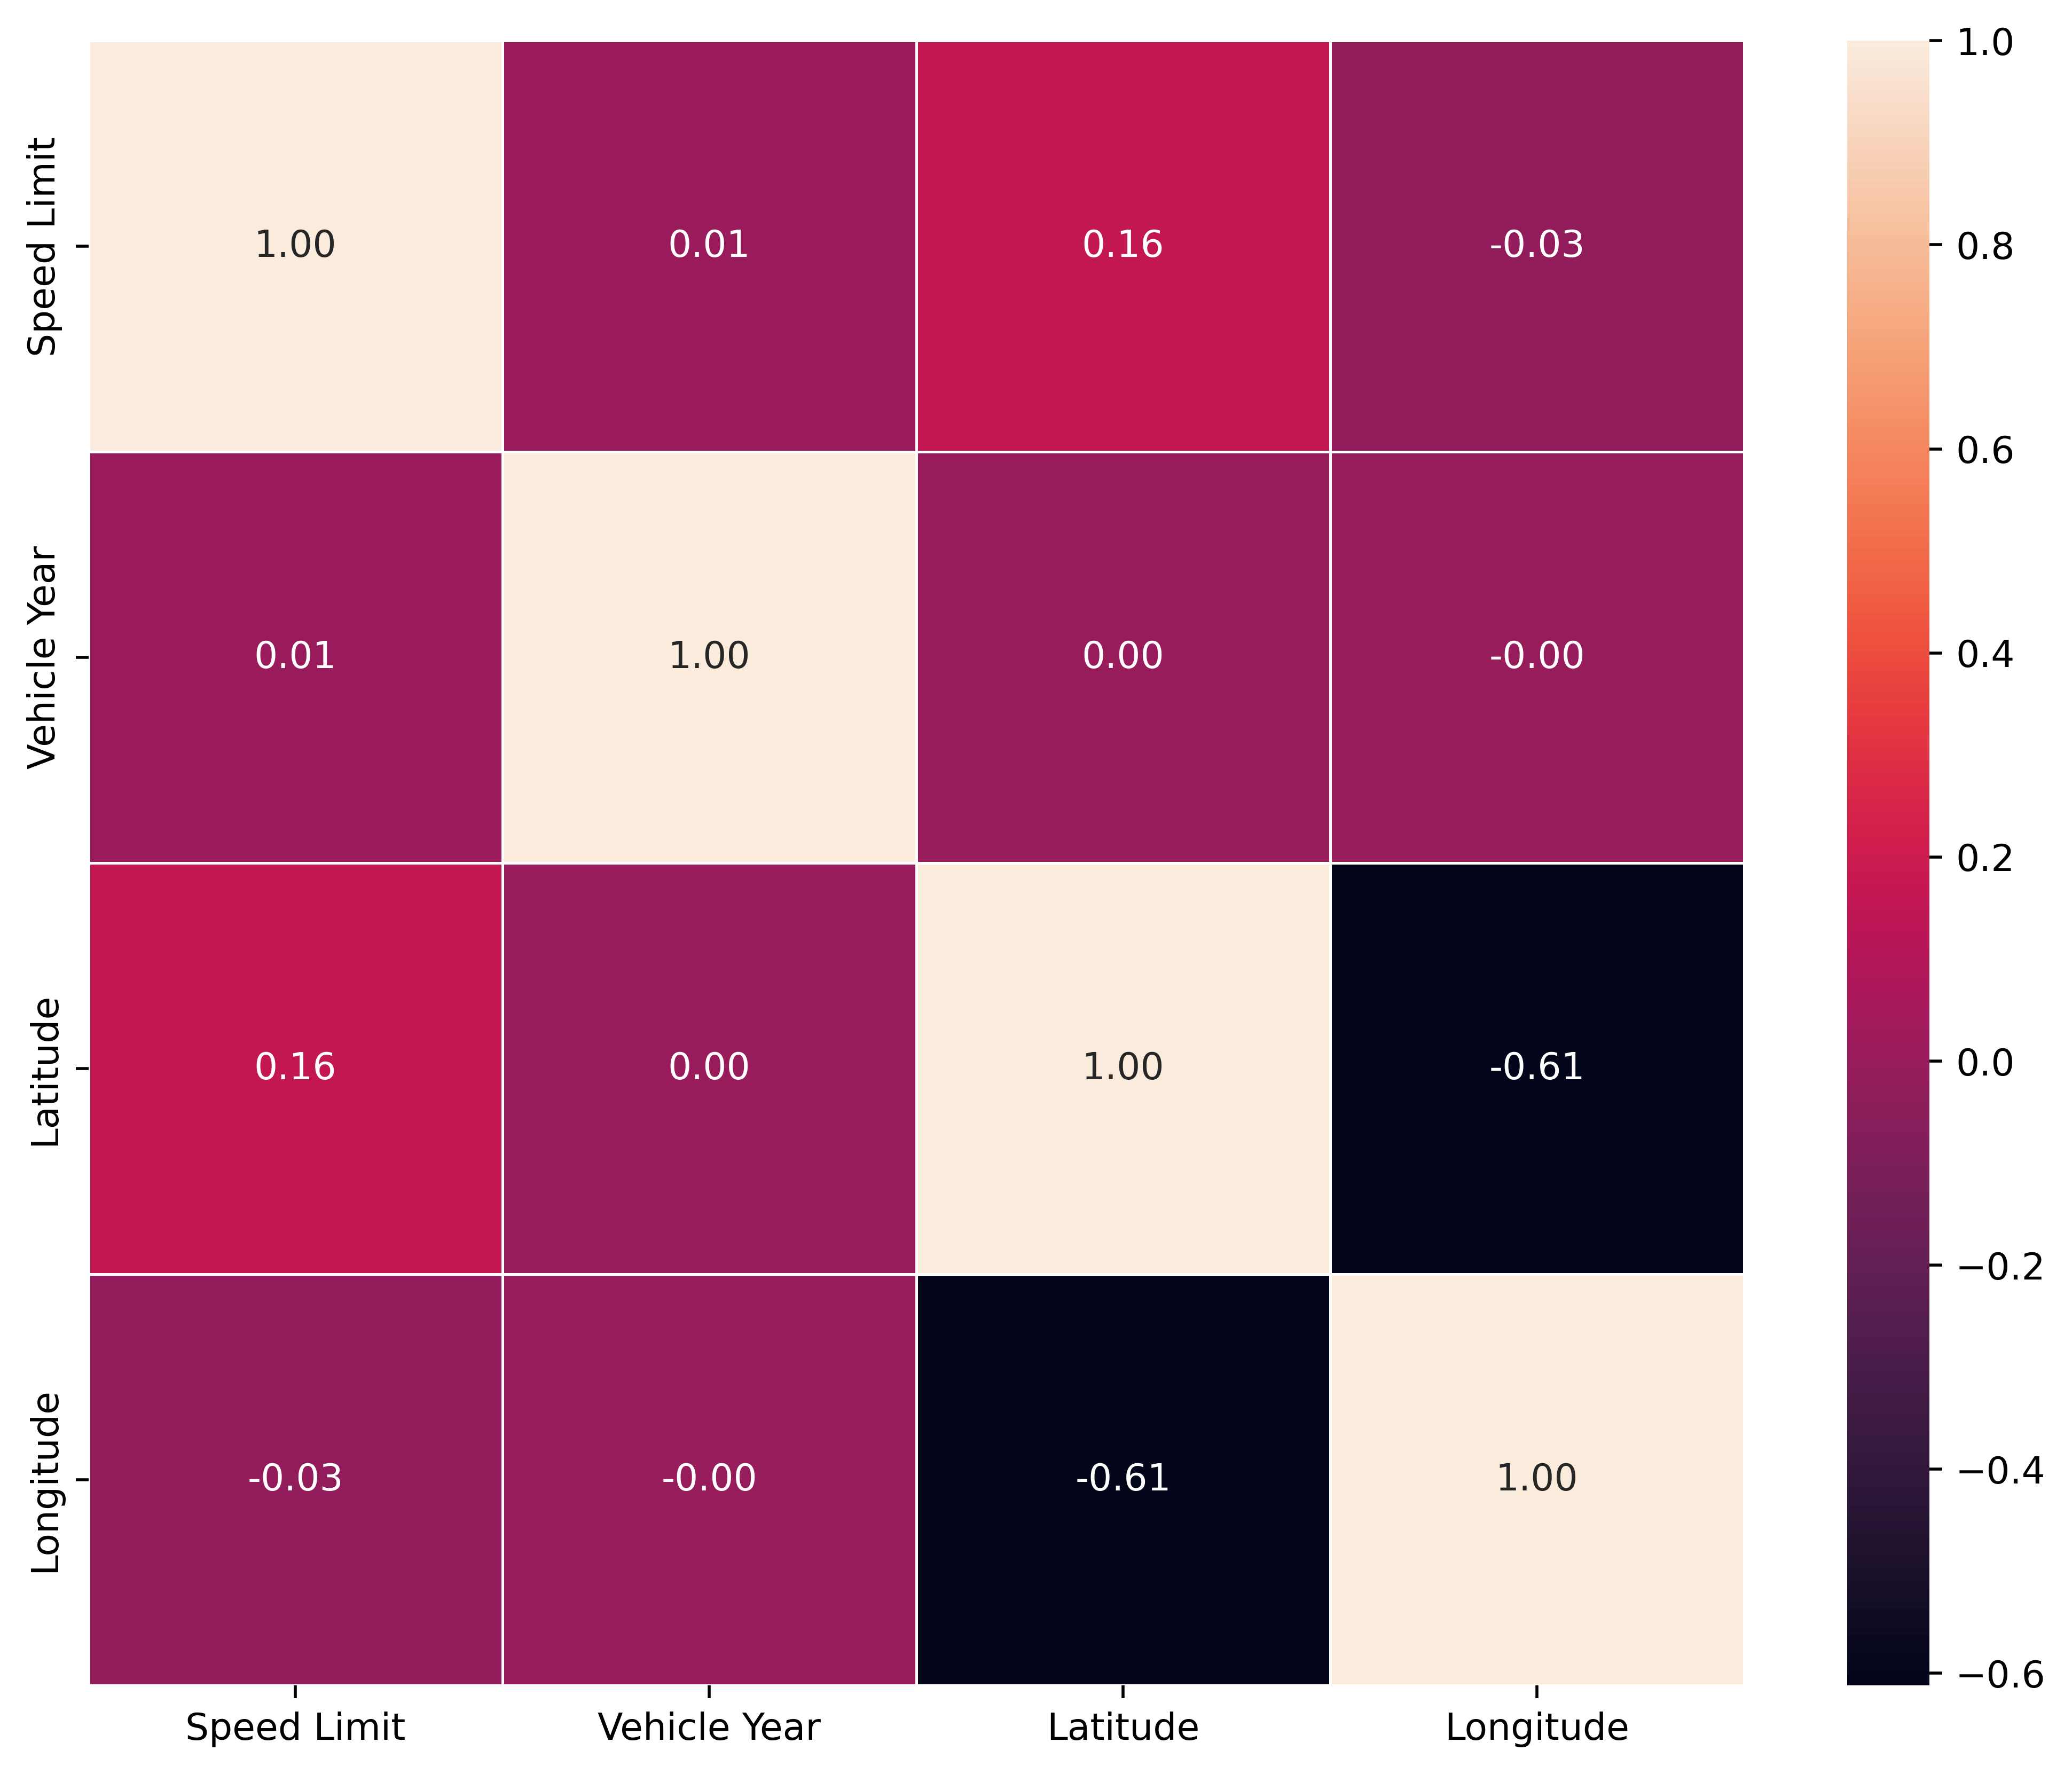

In [32]:
# Step 1: Check the data types of the columns to identify non-numeric columns
print(dropna_df.dtypes)

# Step 2: Drop non-numeric columns before calculating the correlation matrix
# This will keep only numeric columns
numeric_df = dropna_df.select_dtypes(include=['number'])

# Step 3: Now calculate the correlation matrix
corr = numeric_df.corr()

# Step 4: Plot the heatmap
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5)
plt.show()


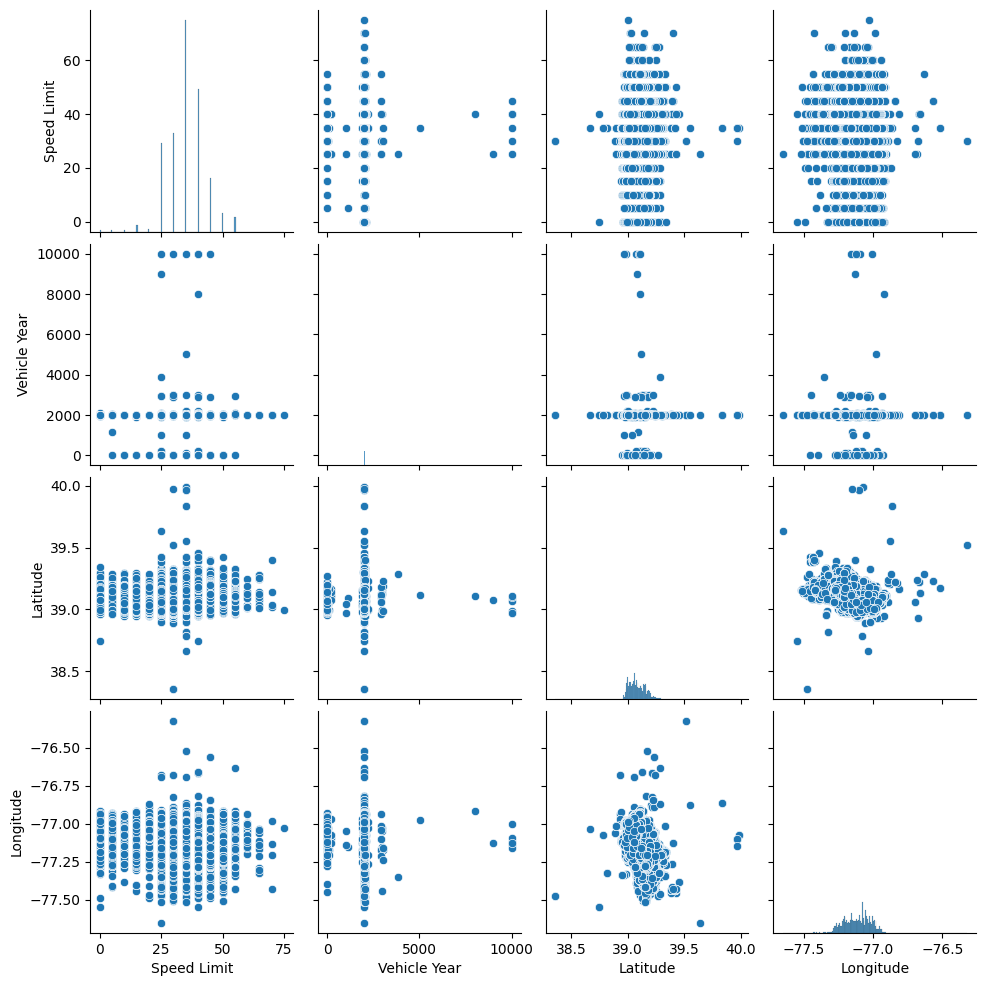

In [33]:
sns.pairplot(dropna_df)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Variables=['ACRS Report Type','Collision Type','Weather','Surface Condition','Light','Driver Substance Abuse','Injury Severity','Vehicle Damage Extent','Vehicle Body Type','Driverless Vehicle','Parked Vehicle']
dropna_df[Variables]=dropna_df[Variables].apply(le.fit_transform)
dropna_df[Variables]

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Injury Severity,Vehicle Damage Extent,Vehicle Body Type,Driverless Vehicle,Parked Vehicle
5,1,15,4,0,4,8,2,3,0,0,0
6,2,22,3,0,4,8,2,3,26,0,0
8,2,15,3,0,1,8,2,3,26,0,0
9,2,7,3,0,1,8,2,1,26,0,0
10,2,22,4,0,4,8,2,1,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...
184141,1,3,8,1,10,9,8,9,30,0,0
184144,2,3,5,1,6,9,3,2,30,0,0
184150,1,5,5,1,6,9,5,2,30,0,0
184167,2,3,5,1,10,9,3,2,30,0,0


In [35]:
dropna_df['Driver_At_Fault_encoded']=le.fit_transform(dropna_df['Driver At Fault'])
dropna_df

,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,Surface Condition,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location,Driver_At_Fault_encoded
5,230051804,Montgomery County Police,1,08/28/2023 11:09:00 AM,Maryland (State),NORBECK RD,DRURY RD,15,4,0,...,30,0,0,2010,MERCEDES,ML360,39.116462,-77.050530,"(39.11646167, -77.05053)",0
6,230046425,Montgomery County Police,2,07/27/2023 12:30:00 PM,County,GREENTREE RD,OLD GEORGETOWN RD,22,3,0,...,30,0,0,2022,HOND,PILOT,39.000144,-77.109881,"(39.00014446, -77.10988077)",0
8,230065250,Montgomery County Police,2,11/10/2023 08:24:00 PM,Maryland (State),GEORGIA AVE,MAY ST,15,3,0,...,35,0,0,2016,TOYOTA,CAMRY,39.072460,-77.064860,"(39.0724598, -77.06486034)",0
9,230060937,Montgomery County Police,2,10/16/2023 07:33:00 PM,Maryland (State),GEORGIA AVE,LINDELL ST,7,3,0,...,35,0,0,2021,HONDA,ACCORD,39.054407,-77.050488,"(39.05440667, -77.05048833)",2
10,230057666,Gaithersburg Police Depar,2,09/30/2023 10:34:00 AM,Municipality,PERRY PKWY,ENT TO SHOPPING CENTER,22,4,0,...,35,0,0,2002,HOND,ACCORD,39.148779,-77.213439,"(39.14877898, -77.21343947)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184141,240040966,MONTGOMERY,1,08/29/2024 05:11:00 PM,County Route,BOURNEFIELD WAY,BROADBIRCH DR,3,8,1,...,25,0,0,2005,HYUNDAI,SONATA,39.055611,-76.961737,"(39.05561076, -76.96173688)",0
184144,240041478,MONTGOMERY,2,09/01/2024 10:23:00 PM,Maryland (State) Route,NORBECK RD,LAYHILL RD (SB/L),3,5,1,...,45,0,0,2016,HONDA,ACCORD,39.120502,-77.034008,"(39.1205018, -77.03400827)",2
184150,240041182,MONTGOMERY,1,08/30/2024 11:55:00 PM,Maryland (State) Route,NEW HAMPSHIRE AVE (SB/L),FOX ST,5,5,1,...,35,0,0,2005,HONDA,ACCORD,39.008193,-76.979999,"(39.00819331, -76.97999857)",0
184167,240041125,MONTGOMERY,2,08/30/2024 04:11:00 PM,County Route,LEAMAN FARM RD,GREAT SENECA HWY (SB/L),3,5,1,...,35,0,0,2010,TOYOTA,COROLLA,39.155791,-77.276755,"(39.15579135, -77.27675486)",2


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
independent_Var= ['ACRS Report Type','Collision Type','Weather','Surface Condition','Light','Driver Substance Abuse','Injury Severity','Speed Limit','Vehicle Damage Extent','Vehicle Body Type']
X=dropna_df[independent_Var]
Y=dropna_df['Driver_At_Fault_encoded']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)
model=LogisticRegression()
model.fit(X_train,Y_train)
model.classes_
print(model.classes_)
le.inverse_transform([0,1,2])
print(le.inverse_transform([0,1,2]))
predicted=model.predict(X_test)
report=classification_report(Y_test,predicted)
#score the accuracy level
result=model.score(X_test,Y_test)
#print out the results
print(("Accuracy: %.3f%%")%(result*100.0*1.0))

[0 1 2]
['No' 'Unknown' 'Yes']
Accuracy: 78.770%


In [38]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.fit_transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train_Scaled,Y_train)
y_pred_Scaled = LR.predict(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_Scaled = RandomForestClassifier()

# Fit the model on the scaled training data
model_Scaled.fit(X_train_Scaled, Y_train)

# Score the model and print accuracy
Accuracy_scaled = model_Scaled.score(X_test_Scaled, Y_test)
print(("Accuracy: %.3f%%") % (Accuracy_scaled * 100.0*1.0))


Accuracy: 74.234%


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the model on the scaled training data
svm_model.fit(X_train_Scaled, Y_train)

# Score the model and calculate accuracy
accuracy_svm = svm_model.score(X_test_Scaled, Y_test)
print("SVM Accuracy: %.3f%%" % (accuracy_svm * 100.0*1.0))


SVM Accuracy: 71.735%


In [55]:
print(X_test_Scaled.shape)
print(Y_test.shape)


(20050, 10)
(20050,)


In [56]:
import numpy as np
X_test_Scaled = np.array(X_test_Scaled)
Y_test = np.array(Y_test)


In [57]:
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [58]:
 Lr_G = GridSearchCV(LR,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [59]:
Lr_G.fit(X_train_Scaled,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [60]:
print("Tuned Hyperparameters :", Lr_G.best_params_)
print("Accuracy :",Lr_G.best_score_*100.0*1.4)

Tuned Hyperparameters : {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 79.89101361199819


In [61]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)

In [63]:
model.predict([[2,7,2,0,4,1,1,1,29,0]])

array([0])

Predicted that the driver is not at fault

In [65]:
LR.predict([[2,11,1,1,1,1,1,1,1,1]])

array([2])

Predicted that the driver is at fault